# Plot STM Param Results

<p>This notebook plots the spectral parameters from SpectralTimeModel analysis

<p>created: March 18, 2024
<p>last modified:  April 1, 2024

### Imports

In [2]:
# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import zscore

# custom
import sys
sys.path.append("../../code")
from info import SESSIONS, TOTAL_CHANS, FS, EPOCH_TIMES
from paths import PROJECT_PATH
from utils import compute_confidence_interval, subtract_baseline

# settings
plt.style.use('../../mpl_styles/default.mplstyle')

### Main

In [3]:
# load data
data = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_stm_params.csv")
data

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,alpha_pw,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared
0,0,A_SNR_041018,0,0,1,0,0,6.795210,-1.846419,2.337249,...,NaN,NaN,20.890956,0.224983,11.992839,84.198499,0.132514,12.000000,0.032021,0.997366
1,1,A_SNR_041018,0,0,1,0,1,6.737711,-4.511377,2.295678,...,NaN,NaN,20.902825,0.226633,12.000000,61.621175,0.182840,3.827135,0.039661,0.995919
2,2,A_SNR_041018,0,0,1,0,2,6.755493,-4.149983,2.305570,...,NaN,NaN,20.926484,0.222615,12.000000,61.539609,0.193738,3.815145,0.041530,0.995477
3,3,A_SNR_041018,0,0,1,0,3,6.780586,-3.431958,2.320047,...,NaN,NaN,20.866057,0.221432,11.833854,61.507654,0.193887,3.920132,0.040069,0.995806
4,4,A_SNR_041018,0,0,1,0,4,6.825531,-1.580806,2.347456,...,NaN,NaN,20.796904,0.222093,11.686082,61.560461,0.184212,4.285739,0.035822,0.996423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535995,511995,L_SNR_250717,63,1023,16,1023,495,6.992720,-1.496442,2.293409,...,NaN,NaN,20.553714,0.316953,8.651914,62.071582,0.364958,7.753122,0.095770,0.975272
1535996,511996,L_SNR_250717,63,1023,16,1023,496,6.971888,-1.889051,2.283320,...,NaN,NaN,20.532249,0.318419,8.686486,61.977642,0.361673,7.517469,0.094312,0.975615
1535997,511997,L_SNR_250717,63,1023,16,1023,497,6.994990,-0.191089,2.298115,...,NaN,NaN,20.600150,0.298774,8.555499,62.022368,0.360953,7.569785,0.094283,0.975664
1535998,511998,L_SNR_250717,63,1023,16,1023,498,6.949316,-1.983348,2.277146,...,NaN,NaN,20.508147,0.316415,8.653674,61.919241,0.364432,7.401750,0.093088,0.976546


In [4]:
# get df for one session
session_df = data[data.get('session') == 'A_SNR_041018'].loc[((data['window']>124) & (data['window']<375))]

count = 0
z_offs = np.array([])
z_exps = np.array([])

# compute zscore values
for i in range(TOTAL_CHANS):
    # channel zscore values
    data_a = session_df.iloc[np.arange(count, count + 250)]

    z_off = zscore(data_a['offset'], nan_policy='omit')
    z_offs = np.append(z_offs, z_off)

    z_exp = zscore(data_a['exponent'], nan_policy='omit')
    z_exps = np.append(z_exps, z_exp)

    count = count + 250

data_az = session_df.assign(z_offset = z_offs).assign(z_exponent = z_exps)
data_az

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,z_offset,z_exponent
125,125,A_SNR_041018,0,0,1,0,125,9.095829,10721.826880,3.710250,...,NaN,NaN,NaN,87.897677,0.550213,12.000000,0.138132,0.949136,0.290387,0.294235
126,126,A_SNR_041018,0,0,1,0,126,9.173972,13170.810286,3.759973,...,NaN,NaN,NaN,87.860983,0.585712,12.000000,0.140705,0.949153,0.418751,0.437636
127,127,A_SNR_041018,0,0,1,0,127,9.065863,9857.904422,3.686595,...,NaN,NaN,NaN,87.776357,0.531324,12.000000,0.137143,0.949356,0.241163,0.226016
128,128,A_SNR_041018,0,0,1,0,128,8.320205,1217.059767,3.199539,...,NaN,NaN,NaN,65.635337,0.434351,12.000000,0.170350,0.930179,-0.983715,-1.178658
129,129,A_SNR_041018,0,0,1,0,129,9.063875,9745.013243,3.682622,...,NaN,NaN,NaN,87.886478,0.527034,12.000000,0.138641,0.948206,0.237898,0.214555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511870,511870,A_SNR_041018,63,1023,16,1023,370,7.780537,2675.842206,2.886494,...,NaN,NaN,NaN,59.598456,1.455860,5.139190,0.176076,0.876426,0.091791,0.145643
511871,511871,A_SNR_041018,63,1023,16,1023,371,7.788869,2739.895489,2.891872,...,NaN,NaN,NaN,59.601630,1.451756,5.151223,0.176703,0.877198,0.106860,0.162083
511872,511872,A_SNR_041018,63,1023,16,1023,372,7.806379,2870.116943,2.902461,...,NaN,NaN,NaN,59.606101,1.444723,5.165293,0.177741,0.876547,0.138526,0.194452
511873,511873,A_SNR_041018,63,1023,16,1023,373,7.823427,3000.564073,2.914095,...,NaN,NaN,NaN,59.596913,1.445441,5.171411,0.178782,0.875629,0.169357,0.230011


In [22]:
# add time variable to df
data_az = data_az.assign(time = (data_az.get('window')/FS) + EPOCH_TIMES[0])
data_az

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,z_offset,z_exponent,time
125,125,A_SNR_041018,0,0,1,0,125,9.095829,10721.826880,3.710250,...,NaN,NaN,87.897677,0.550213,12.000000,0.138132,0.949136,0.290387,0.294235,-0.050
126,126,A_SNR_041018,0,0,1,0,126,9.173972,13170.810286,3.759973,...,NaN,NaN,87.860983,0.585712,12.000000,0.140705,0.949153,0.418751,0.437636,-0.048
127,127,A_SNR_041018,0,0,1,0,127,9.065863,9857.904422,3.686595,...,NaN,NaN,87.776357,0.531324,12.000000,0.137143,0.949356,0.241163,0.226016,-0.046
128,128,A_SNR_041018,0,0,1,0,128,8.320205,1217.059767,3.199539,...,NaN,NaN,65.635337,0.434351,12.000000,0.170350,0.930179,-0.983715,-1.178658,-0.044
129,129,A_SNR_041018,0,0,1,0,129,9.063875,9745.013243,3.682622,...,NaN,NaN,87.886478,0.527034,12.000000,0.138641,0.948206,0.237898,0.214555,-0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511870,511870,A_SNR_041018,63,1023,16,1023,370,7.780537,2675.842206,2.886494,...,NaN,NaN,59.598456,1.455860,5.139190,0.176076,0.876426,0.091791,0.145643,0.440
511871,511871,A_SNR_041018,63,1023,16,1023,371,7.788869,2739.895489,2.891872,...,NaN,NaN,59.601630,1.451756,5.151223,0.176703,0.877198,0.106860,0.162083,0.442
511872,511872,A_SNR_041018,63,1023,16,1023,372,7.806379,2870.116943,2.902461,...,NaN,NaN,59.606101,1.444723,5.165293,0.177741,0.876547,0.138526,0.194452,0.444
511873,511873,A_SNR_041018,63,1023,16,1023,373,7.823427,3000.564073,2.914095,...,NaN,NaN,59.596913,1.445441,5.171411,0.178782,0.875629,0.169357,0.230011,0.446


In [13]:
# compute left and right endpoint confidence intervals
lci_off = np.array([])
rci_off = np.array([])
lci_exps = np.array([])
rci_exps = np.array([])

for i in np.unique(data_az.get('window')):
    window_df = data_az[data_az.get('window') == i]

    ci_offset = compute_confidence_interval(window_df.get('z_offset'))
    lci_off = np.append(lci_off, ci_offset[0])
    rci_off = np.append(rci_off, ci_offset[1])

    ci_exponent = compute_confidence_interval(window_df.get('z_exponent'))
    lci_exps = np.append(lci_exps, ci_exponent[0])
    rci_exps = np.append(rci_exps, ci_exponent[0])

len(lci_off)

250

In [18]:
data_mean = data_az.groupby('window').mean().reset_index()
#data_mean = data_mean.assign(time = (data_mean.get('window')/FS) + EPOCH_TIMES[0])
data_mean

,window,Unnamed: 0,channel,chan_idx,array,event,offset,knee,exponent,alpha_cf,...,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,z_offset,z_exponent,time
0,125,255875.0,31.5,511.5,8.5,511.5,9.525821,1.083700e+06,3.980091,NaN,...,0.510366,7.543820,75.249561,0.802077,9.076582,0.144067,0.938010,0.175782,0.247399,-0.050
1,126,255876.0,31.5,511.5,8.5,511.5,9.529174,9.967600e+05,3.980214,NaN,...,0.505684,7.704612,74.963151,0.804500,9.042681,0.144959,0.937529,0.178787,0.243127,-0.048
2,127,255877.0,31.5,511.5,8.5,511.5,9.540831,9.979008e+05,3.985805,NaN,...,0.504480,7.877670,75.095739,0.806233,8.999772,0.145416,0.937104,0.220632,0.279194,-0.046
3,128,255878.0,31.5,511.5,8.5,511.5,9.547855,1.048907e+06,3.988577,NaN,...,0.500611,7.754421,75.055574,0.809804,8.990304,0.146186,0.936650,0.251735,0.305282,-0.044
4,129,255879.0,31.5,511.5,8.5,511.5,9.568996,1.373812e+06,4.000256,NaN,...,0.498341,7.924334,75.215131,0.814783,8.936728,0.146548,0.936613,0.304172,0.354394,-0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,370,256120.0,31.5,511.5,8.5,511.5,8.900753,7.342413e+05,3.595782,14.189098,...,0.509401,6.613479,70.377293,0.994794,8.509454,0.155410,0.914826,-0.495025,-0.446469,0.440
246,371,256121.0,31.5,511.5,8.5,511.5,8.914184,7.722515e+05,3.603838,14.184452,...,0.551017,6.286621,70.774144,0.994486,8.507608,0.155134,0.915300,-0.464405,-0.416595,0.442
247,372,256122.0,31.5,511.5,8.5,511.5,8.914183,8.009100e+05,3.603974,14.219497,...,0.591012,6.295386,70.788112,0.993026,8.436614,0.154979,0.915562,-0.462554,-0.413875,0.444
248,373,256123.0,31.5,511.5,8.5,511.5,8.898880,7.859833e+05,3.593787,14.187938,...,0.592492,6.595748,70.704891,0.992038,8.432863,0.155903,0.914794,-0.480497,-0.433448,0.446


In [44]:
# subtract basleine for offset (data_az)
relative_off = subtract_baseline(data_az.get('z_offset'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
data_az = data_az.assign(relative_offset=relative_off)
data_az


,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,z_offset,z_exponent,time,relative_offset
125,125,A_SNR_041018,0,0,1,0,125,9.095829,10721.826880,3.710250,...,NaN,87.897677,0.550213,12.000000,0.138132,0.949136,0.290387,0.294235,-0.050,-0.156069
126,126,A_SNR_041018,0,0,1,0,126,9.173972,13170.810286,3.759973,...,NaN,87.860983,0.585712,12.000000,0.140705,0.949153,0.418751,0.437636,-0.048,-0.027705
127,127,A_SNR_041018,0,0,1,0,127,9.065863,9857.904422,3.686595,...,NaN,87.776357,0.531324,12.000000,0.137143,0.949356,0.241163,0.226016,-0.046,-0.205294
128,128,A_SNR_041018,0,0,1,0,128,8.320205,1217.059767,3.199539,...,NaN,65.635337,0.434351,12.000000,0.170350,0.930179,-0.983715,-1.178658,-0.044,-1.430172
129,129,A_SNR_041018,0,0,1,0,129,9.063875,9745.013243,3.682622,...,NaN,87.886478,0.527034,12.000000,0.138641,0.948206,0.237898,0.214555,-0.042,-0.208558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511870,511870,A_SNR_041018,63,1023,16,1023,370,7.780537,2675.842206,2.886494,...,NaN,59.598456,1.455860,5.139190,0.176076,0.876426,0.091791,0.145643,0.440,-0.354666
511871,511871,A_SNR_041018,63,1023,16,1023,371,7.788869,2739.895489,2.891872,...,NaN,59.601630,1.451756,5.151223,0.176703,0.877198,0.106860,0.162083,0.442,-0.339597
511872,511872,A_SNR_041018,63,1023,16,1023,372,7.806379,2870.116943,2.902461,...,NaN,59.606101,1.444723,5.165293,0.177741,0.876547,0.138526,0.194452,0.444,-0.307930
511873,511873,A_SNR_041018,63,1023,16,1023,373,7.823427,3000.564073,2.914095,...,NaN,59.596913,1.445441,5.171411,0.178782,0.875629,0.169357,0.230011,0.446,-0.277100


In [45]:
# # subtract basleine for offset (data_mean)
# subtract_baseline(data_mean.get('z_offset'), data_mean.get('time'), np.array([data_mean.get('time').min(), data_mean.get('time').max()]))

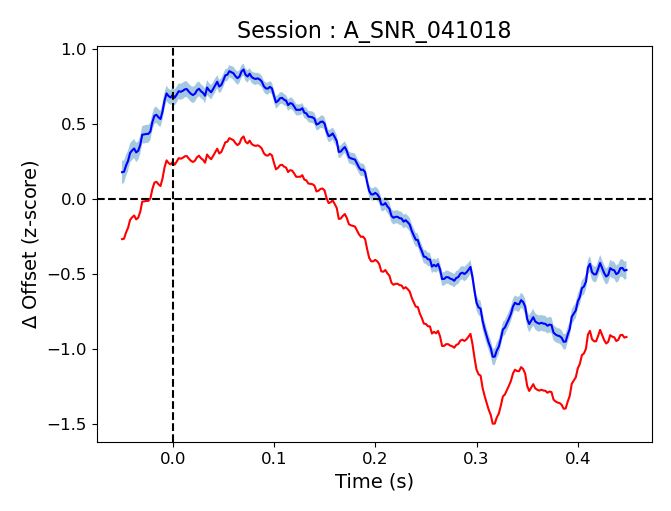

In [46]:
data_az = data_az.groupby('window').mean().reset_index()

fig, ax = plt.subplots()
ax.plot(data_az.get('time'), data_az.get('z_offset'), c='b')
ax.plot(data_az.get('time'), data_az.get('relative_offset'), c='r')
ax.fill_between(data_az.get('time'), lci_off, rci_off, alpha=0.4)
ax.set_title('Session : A_SNR_041018')
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'$\Delta$ Offset (z-score)')
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
plt.show()
# ax.fill_between(avg_a18.get('window'), (avg_a18.get('z_offset') - ci), (avg_a18.get('z_offset') + ci), color='b', alpha=.1)

### All sessions

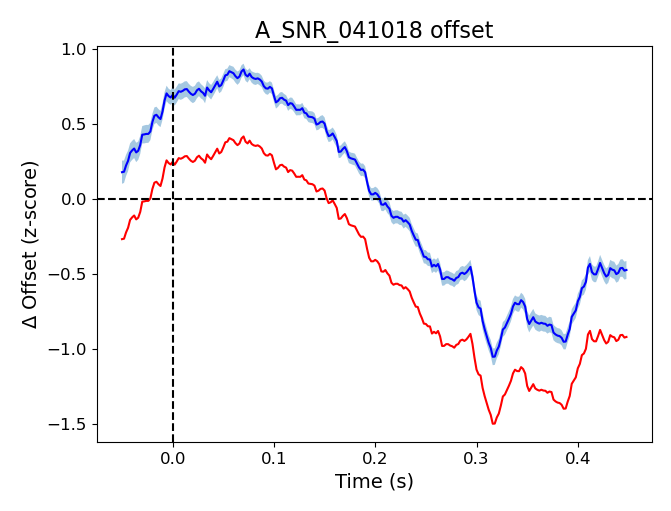

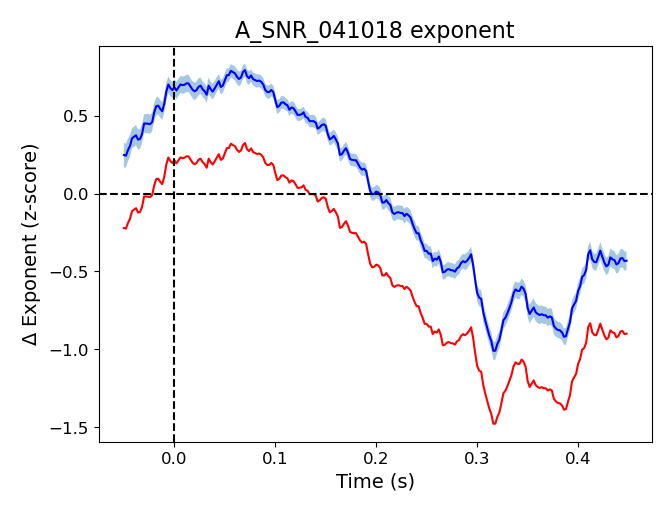

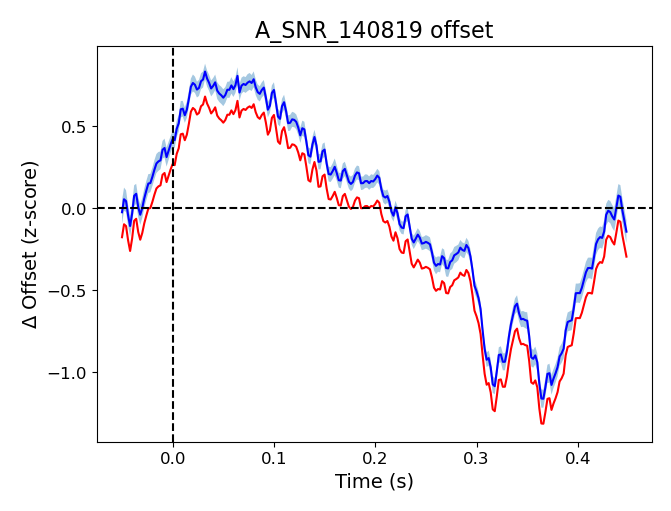

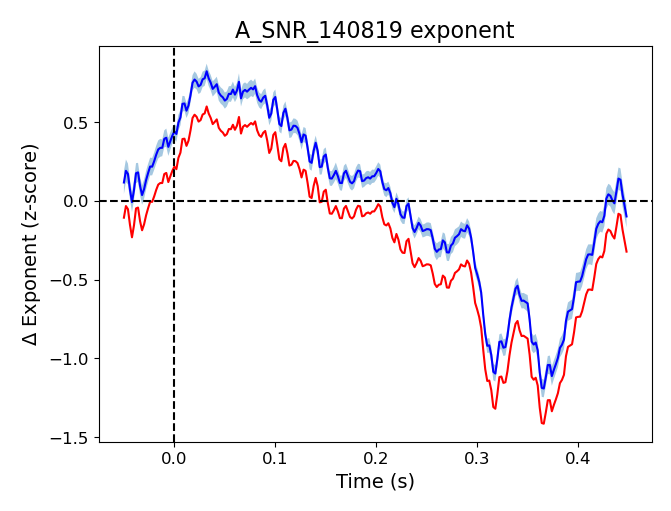

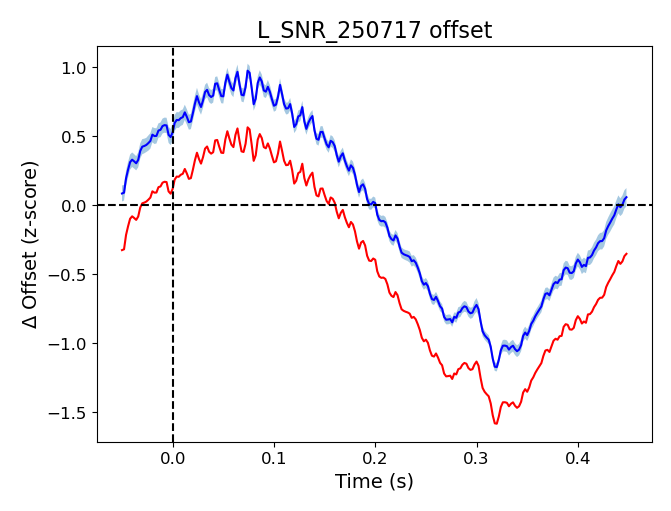

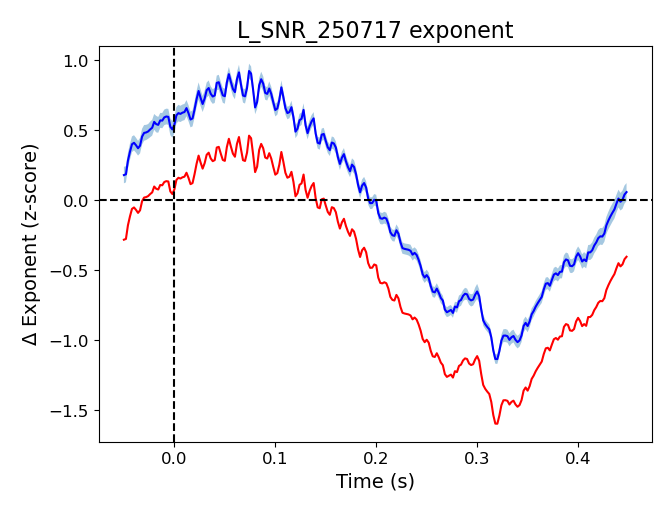

In [5]:
for session in SESSIONS:
    # get df for one session
    session_df = data[data.get('session') == session].loc[((data['window']>124) & (data['window']<375))]

    count = 0
    z_offs = np.array([])
    z_exps = np.array([])

    for i in range(TOTAL_CHANS):
        # channel zscore values
        data_a = session_df.iloc[np.arange(count, count + 250)]

        z_off = zscore(data_a['offset'], nan_policy='omit')
        z_offs = np.append(z_offs, z_off)

        z_exp = zscore(data_a['exponent'], nan_policy='omit')
        z_exps = np.append(z_exps, z_exp)

        count = count + 250
    
    # add zscore and time variables to df
    data_az = session_df.assign(z_offset = z_offs).assign(z_exponent = z_exps).assign(time = (session_df.get('window')/FS) + EPOCH_TIMES[0])

    # subtract basleine 
    relative_off = subtract_baseline(data_az.get('z_offset'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
    data_az = data_az.assign(relative_offset=relative_off)
    relative_exp = subtract_baseline(data_az.get('z_exponent'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
    data_az = data_az.assign(relative_exponent=relative_exp)

    # compute left and right endpoint confidence intervals
    lci_off = np.array([])
    rci_off = np.array([])
    lci_exp = np.array([])
    rci_exp = np.array([])

    for i in np.unique(data_az.get('window')):
        window_df = data_az[data_az.get('window') == i]

        ci_offset = compute_confidence_interval(window_df.get('z_offset'))
        lci_off = np.append(lci_off, ci_offset[0])
        rci_off = np.append(rci_off, ci_offset[1])

        ci_exponent = compute_confidence_interval(window_df.get('z_exponent'))
        lci_exp = np.append(lci_exp, ci_exponent[0])
        rci_exp = np.append(rci_exp, ci_exponent[1])


    # average components per window
    data_az = data_az.groupby('window').mean().reset_index()

    # plot offset
    fig, ax = plt.subplots()
    ax.plot(data_az.get('time'), data_az.get('z_offset'), c='b')
    ax.plot(data_az.get('time'), data_az.get('relative_offset'), c='r')
    ax.fill_between(data_az.get('time'), lci_off, rci_off, alpha=0.4)
    
    ax.set_title(f'{session} offset')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\Delta$ Offset (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_offset')

    # plot exponent
    fig, ax = plt.subplots()
    ax.plot(data_az.get('time'), data_az.get('z_exponent'), c='b')
    ax.plot(data_az.get('time'), data_az.get('relative_exponent'), c='r')
    ax.fill_between(data_az.get('time'), lci_exp, rci_exp, alpha=0.4)
    
    ax.set_title(f'{session} exponent')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\Delta$ Exponent (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_exponent')

### MUA Analysis
Compare MUA activity to exponent and offset activity. For this I will basically repeat the process above but implement the MUA variable in our calculations

In [4]:
data_mua = pd.read_csv(f'{PROJECT_PATH}/data/results/lfp_stm_params_mua.csv')
data_mua

,Unnamed: 0.1,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,...,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,mua
0,0,0,A_SNR_041018,0,0,1,0,0,6.795210,-1.846419,...,NaN,20.890956,0.224983,11.992839,84.198499,0.132514,12.000000,0.032021,0.997366,4.001785
1,1,1,A_SNR_041018,0,0,1,0,1,6.737711,-4.511377,...,NaN,20.902825,0.226633,12.000000,61.621175,0.182840,3.827135,0.039661,0.995919,4.143617
2,2,2,A_SNR_041018,0,0,1,0,2,6.755493,-4.149983,...,NaN,20.926484,0.222615,12.000000,61.539609,0.193738,3.815145,0.041530,0.995477,4.229744
3,3,3,A_SNR_041018,0,0,1,0,3,6.780586,-3.431958,...,NaN,20.866057,0.221432,11.833854,61.507654,0.193887,3.920132,0.040069,0.995806,4.241834
4,4,4,A_SNR_041018,0,0,1,0,4,6.825531,-1.580806,...,NaN,20.796904,0.222093,11.686082,61.560461,0.184212,4.285739,0.035822,0.996423,4.294244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535995,1535995,511995,L_SNR_250717,63,1023,16,1023,495,6.992720,-1.496442,...,NaN,20.553714,0.316953,8.651914,62.071582,0.364958,7.753122,0.095770,0.975272,5.055824
1535996,1535996,511996,L_SNR_250717,63,1023,16,1023,496,6.971888,-1.889051,...,NaN,20.532249,0.318419,8.686486,61.977642,0.361673,7.517469,0.094312,0.975615,5.253525
1535997,1535997,511997,L_SNR_250717,63,1023,16,1023,497,6.994990,-0.191089,...,NaN,20.600150,0.298774,8.555499,62.022368,0.360953,7.569785,0.094283,0.975664,5.049650
1535998,1535998,511998,L_SNR_250717,63,1023,16,1023,498,6.949316,-1.983348,...,NaN,20.508147,0.316415,8.653674,61.919241,0.364432,7.401750,0.093088,0.976546,4.720909


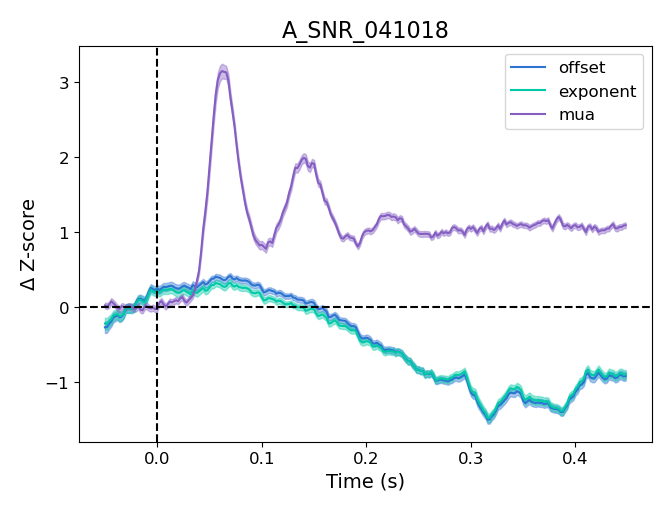

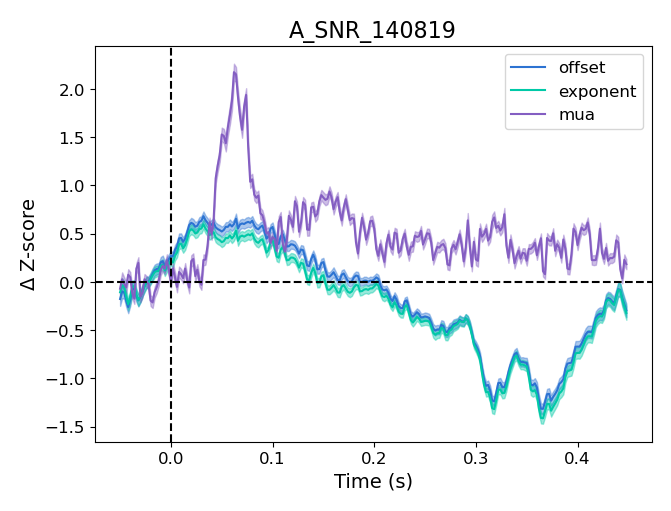

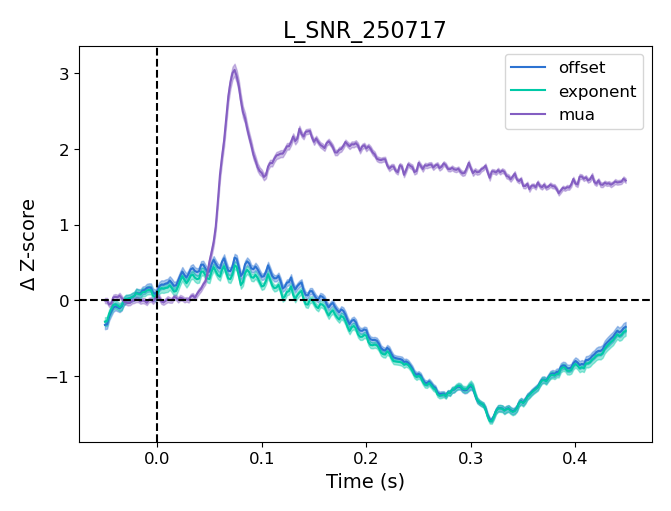

In [14]:
# for session in SESSIONS:
#     # get df for one session
#     session_df_mua = data_mua[data_mua.get('session') == session].loc[((data_mua['window']>124) & (data_mua['window']<375))]

#     count = 0
#     z_offs = np.array([])
#     z_exps = np.array([])
#     z_muas = np.array([])

#     for i in range(TOTAL_CHANS):
#         # channel zscore values
#         data_a = session_df_mua.iloc[np.arange(count, count + 250)]

#         z_off = zscore(data_a['offset'], nan_policy='omit')
#         z_offs = np.append(z_offs, z_off)

#         z_exp = zscore(data_a['exponent'], nan_policy='omit')
#         z_exps = np.append(z_exps, z_exp)

#         z_m = zscore(data_a['mua'], nan_policy='omit')
#         z_muas = np.append(z_muas, z_m)

#         count = count + 250

#     # add zscore and time variables to df
#     data_az = session_df_mua.assign(z_offset = z_offs).assign(z_exponent = z_exps).assign(z_mua = z_muas)
#     data_az = data_az.assign(time = (session_df_mua.get('window')/FS) + EPOCH_TIMES[0])

#     # subtract basleine 
#     relative_off = subtract_baseline(data_az.get('z_offset'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
#     data_az = data_az.assign(relative_offset=relative_off)
#     relative_exp = subtract_baseline(data_az.get('z_exponent'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
#     data_az = data_az.assign(relative_exponent=relative_exp)
#     relative_mua = subtract_baseline(data_az.get('z_mua'), data_az.get('time'), np.array([data_az.get('time').min(), 0]))
#     data_az = data_az.assign(relative_mua=relative_mua)

#     # compute left and right endpoint confidence intervals
#     lci_off = np.array([])
#     rci_off = np.array([])
#     lci_exp = np.array([])
#     rci_exp = np.array([])
#     lci_mua = np.array([])
#     rci_mua = np.array([])

#     for i in np.unique(data_az.get('window')):
#         window_df = data_az[data_az.get('window') == i]

#         ci_offset = compute_confidence_interval(window_df.get('relative_offset'))
#         lci_off = np.append(lci_off, ci_offset[0])
#         rci_off = np.append(rci_off, ci_offset[1])

#         ci_exponent = compute_confidence_interval(window_df.get('relative_exponent'))
#         lci_exp = np.append(lci_exp, ci_exponent[0])
#         rci_exp = np.append(rci_exp, ci_exponent[1])

#         ci_mua  =compute_confidence_interval(window_df.get('relative_mua'))
#         lci_mua = np.append(lci_mua, ci_mua[0])
#         rci_mua = np.append(rci_mua, ci_mua[1])

#     # average components per window
#     data_az = data_az.groupby('window').mean().reset_index()

#     # plot variables
#     fig, ax = plt.subplots()
#     ax.plot(data_az.get('time'), data_az.get('relative_offset'), c='#2C73D2', label='offset')
#     ax.fill_between(data_az.get('time'), lci_off, rci_off, color='#2C73D2', alpha=0.4)

#     ax.plot(data_az.get('time'), data_az.get('relative_exponent'), c='#00C9A7', label='exponent')
#     ax.fill_between(data_az.get('time'), lci_exp, rci_exp, color='#00C9A7', alpha=0.4)

#     ax.plot(data_az.get('time'), data_az.get('relative_mua'), c='#845EC2', label='mua')
#     ax.fill_between(data_az.get('time'), lci_mua, rci_mua, color='#845EC2', alpha=0.4)

#     ax.set_title(f'{session}')
#     ax.set_xlabel('Time (s)')
#     plt.legend()
#     ax.set_ylabel(r'$\Delta$ Z-score')
#     ax.axhline(y=0, color='k', linestyle='--')
#     ax.axvline(x=0, color='k', linestyle='--')
#     plt.show()
    
#     fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_zscore')

session : A_SNR_041018
starting var : offset
subtracting baseline
starting var : exponent
subtracting baseline
starting var : mua
subtracting baseline


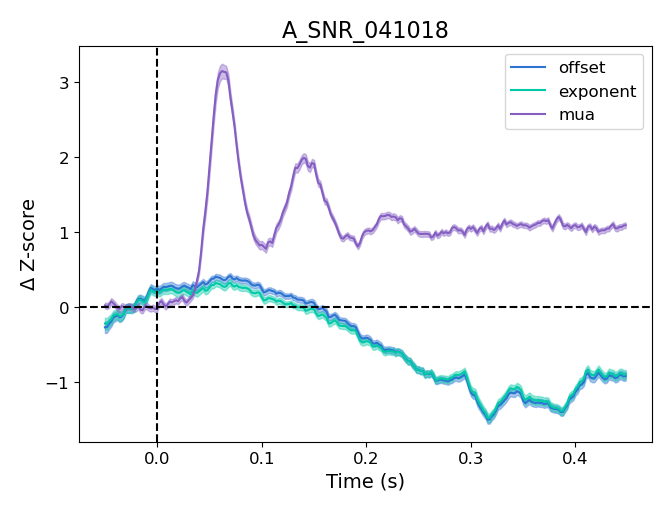

session : A_SNR_140819
starting var : offset
subtracting baseline
starting var : exponent
subtracting baseline
starting var : mua
subtracting baseline


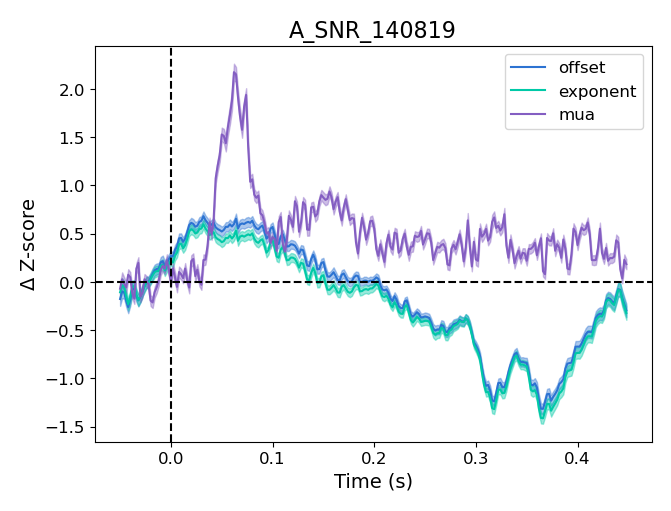

session : L_SNR_250717
starting var : offset
subtracting baseline
starting var : exponent
subtracting baseline
starting var : mua
subtracting baseline


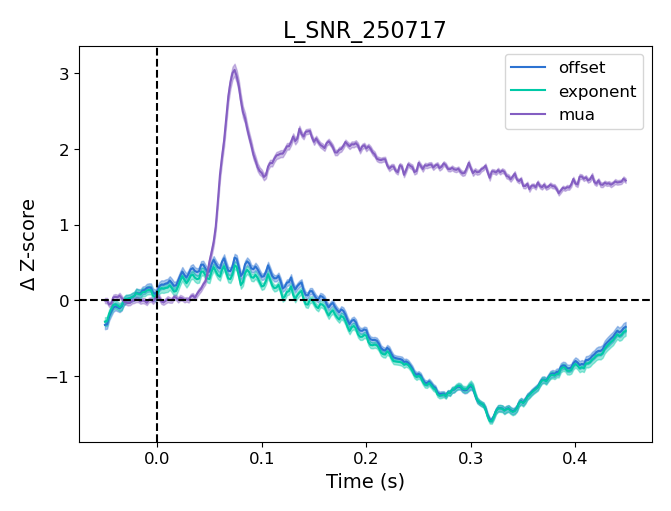

In [20]:
for session in SESSIONS:
    print(f'session : {session}')

    # get df for one session and include time variable
    session_df_mua = data_mua[data_mua.get('session') == session].loc[((data_mua['window']>124) & (data_mua['window']<375))]
    session_df_mua['time'] = (session_df_mua.get('window')/FS) + EPOCH_TIMES[0]

    vars = ['offset', 'exponent', 'mua']
    ci = {'lci_offset':[], 'rci_offset':[], 'lci_exponent':[], 'rci_exponent':[], 'lci_mua':[], 'rci_mua':[]}

    for var in vars:
        print(f'starting var : {var}')
        count = 0
        z_vars = np.array([])

        for i in range(TOTAL_CHANS):
            # channel zscore values
            data_a = session_df_mua.iloc[np.arange(count, count + 250)]

            z_var = zscore(data_a[var], nan_policy='omit')
            z_vars = np.append(z_vars, z_var)

            count = count + 250

        # add zscore and time variables to df
        session_df_mua[f"z_{var}"] = z_vars
        
        # subtract baseline
        print('subtracting baseline')
        session_df_mua[f'relative_{var}'] = subtract_baseline(session_df_mua.get(f'z_{var}'), session_df_mua.get('time'), np.array([session_df_mua.get('time').min(), 0]))

        # compute left and right endpoint confidence intervals
        lci_var = np.array([])
        rci_var = np.array([])

        for i in np.unique(session_df_mua.get('window')):
            window_df = session_df_mua[session_df_mua.get('window') == i]

            ci_var = compute_confidence_interval(window_df.get(f'relative_{var}'))
            ci[f'lci_{var}'].append(ci_var[0])
            ci[f'rci_{var}'].append(ci_var[1])
        
    # average components per window
    session_df_mua = session_df_mua.groupby('window').mean().reset_index()

    # plot variables
    fig, ax = plt.subplots()
    ax.plot(session_df_mua.get('time'), session_df_mua.get('relative_offset'), c='#2C73D2', label='offset')
    ax.fill_between(session_df_mua.get('time'), ci.get('lci_offset'), ci.get('rci_offset'), color='#2C73D2', alpha=0.4)

    ax.plot(session_df_mua.get('time'), session_df_mua.get('relative_exponent'), c='#00C9A7', label='exponent')
    ax.fill_between(session_df_mua.get('time'), ci.get('lci_exponent'), ci.get('rci_exponent'),  color='#00C9A7', alpha=0.4)

    ax.plot(session_df_mua.get('time'), session_df_mua.get('relative_mua'), c='#845EC2', label='mua')
    ax.fill_between(session_df_mua.get('time'), ci.get('lci_mua'), ci.get('rci_mua'),  color='#845EC2', alpha=0.4)

    ax.set_title(f'{session}')
    ax.set_xlabel('Time (s)')
    plt.legend()
    ax.set_ylabel(r'$\Delta$ Z-score')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    plt.show()
    
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_zscore')